In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1_with_coords.csv")
train_data.head()

,Unnamed: 0,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,0,2,2024-01-03T19:42:57.000,2024-01-03T20:15:55.000,1.0,16.67,1.0,N,132,165,...,5.00,0.00,1.0,73.55,0.0,1.75,40.642948,-73.779373,40.618882,-73.965489
1,1,2,2024-01-03T18:43:26.000,2024-01-03T18:43:29.000,2.0,0.01,5.0,N,95,95,...,17.54,0.00,1.0,105.23,0.0,0.00,40.723101,-73.846613,40.723101,-73.846613
2,2,2,2024-01-03T17:00:52.000,2024-01-03T17:01:05.000,2.0,0.00,5.0,N,265,265,...,0.00,0.00,1.0,121.00,0.0,0.00,NaN,NaN,NaN,NaN
3,3,2,2024-01-03T10:00:04.000,2024-01-03T11:08:22.000,1.0,21.60,1.0,N,132,136,...,18.46,6.94,1.0,110.75,0.0,1.75,40.642948,-73.779373,40.872570,-73.902662
4,4,2,2024-01-01T00:01:58.000,2024-01-01T00:10:04.000,3.0,1.70,1.0,N,234,144,...,2.36,0.00,1.0,18.06,2.5,0.00,40.736072,-73.990189,40.722500,-73.994000


In [5]:
train_data.dtypes

,0
Unnamed: 0,int64
vendorid,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
ratecodeid,float64
store_and_fwd_flag,object
pulocationid,int64
dolocationid,int64


In [6]:
train_data.shape

(9885535, 24)

In [7]:
print('Old size: %d' % len(train_data))
df_filtered = train_data[(train_data['pickup_lat'] != 0) | (train_data['pickup_lon'] != 0)|(train_data['dropoff_lat'] != 0) | (train_data['dropoff_lon'] != 0)]
print('New size: %d' % len(train_data))
df_filtered

Old size: 9885535
New size: 9885535


,Unnamed: 0,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,0,2,2024-01-03T19:42:57.000,2024-01-03T20:15:55.000,1.0,16.67,1.0,N,132,165,...,5.00,0.00,1.0,73.55,0.0,1.75,40.642948,-73.779373,40.618882,-73.965489
1,1,2,2024-01-03T18:43:26.000,2024-01-03T18:43:29.000,2.0,0.01,5.0,N,95,95,...,17.54,0.00,1.0,105.23,0.0,0.00,40.723101,-73.846613,40.723101,-73.846613
2,2,2,2024-01-03T17:00:52.000,2024-01-03T17:01:05.000,2.0,0.00,5.0,N,265,265,...,0.00,0.00,1.0,121.00,0.0,0.00,NaN,NaN,NaN,NaN
3,3,2,2024-01-03T10:00:04.000,2024-01-03T11:08:22.000,1.0,21.60,1.0,N,132,136,...,18.46,6.94,1.0,110.75,0.0,1.75,40.642948,-73.779373,40.872570,-73.902662
4,4,2,2024-01-01T00:01:58.000,2024-01-01T00:10:04.000,3.0,1.70,1.0,N,234,144,...,2.36,0.00,1.0,18.06,2.5,0.00,40.736072,-73.990189,40.722500,-73.994000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885530,9999995,2,2023-10-02T17:05:24.000,2023-10-02T18:11:24.000,2.0,22.34,2.0,N,132,230,...,17.19,6.94,1.0,104.88,2.5,1.75,40.642948,-73.779373,40.759508,-73.984159
9885531,9999996,1,2023-10-02T17:05:23.000,2023-10-02T17:21:18.000,3.0,1.70,1.0,N,161,143,...,0.00,0.00,1.0,22.10,2.5,0.00,40.765064,-73.985319,40.763935,-73.979460
9885532,9999997,2,2023-10-02T17:05:22.000,2023-10-02T17:19:19.000,5.0,1.41,1.0,N,43,163,...,4.00,0.00,1.0,24.00,2.5,0.00,40.782773,-73.965363,40.764840,-73.985172
9885533,9999998,2,2023-10-02T17:05:22.000,2023-10-02T17:27:14.000,6.0,4.43,1.0,N,170,43,...,0.00,0.00,1.0,30.50,2.5,0.00,40.748157,-73.978750,40.782773,-73.965363


In [8]:
# 假设你已经读取了数据为 train_data
# 示例：如果还未读取 CSV 文件，可使用：
# train_data = pd.read_csv("your_file.csv")

# 1. 去除 'T'，将其替换为空格
train_data['clean_datetime'] = train_data['tpep_pickup_datetime'].str.replace('T', ' ', regex=False)

# 2. 去除 .000 毫秒部分（保留到秒）
train_data['clean_datetime'] = train_data['clean_datetime'].str.replace(r'\.\d+$', '', regex=True)

# 3. 转换为真正的 datetime 类型
train_data['clean_datetime'] = pd.to_datetime(train_data['clean_datetime'], format='%Y-%m-%d %H:%M:%S')

# 4. 提取 年 / 月 / 日
train_data['year'] = train_data['clean_datetime'].dt.year
train_data['month'] = train_data['clean_datetime'].dt.month
train_data['day'] = train_data['clean_datetime'].dt.date  # 日期保留年月日，去掉时分秒

# 5. 统计各维度数量
year_counts = train_data['year'].value_counts().sort_index()
month_counts = train_data['month'].value_counts().sort_index()
day_counts = train_data['day'].value_counts().sort_index()

# 6. 打印统计结果
print("📊 年份数据量统计：")
print(year_counts)

print("\n📊 月份数据量统计：")
print(month_counts)

print("\n📊 每日数据量统计：")
print(day_counts)


📊 年份数据量统计：
year
2023    9885529
2024          6
Name: count, dtype: int64

📊 月份数据量统计：
month
1           6
10    3249103
11    3302691
12    3333735
Name: count, dtype: int64

📊 每日数据量统计：
day
2023-10-02     24751
2023-10-03     76373
2023-10-04    117905
2023-10-05    122381
2023-10-06    114959
               ...  
2023-12-29     84838
2023-12-30     81232
2023-12-31     75640
2024-01-01         2
2024-01-03         4
Name: count, Length: 93, dtype: int64


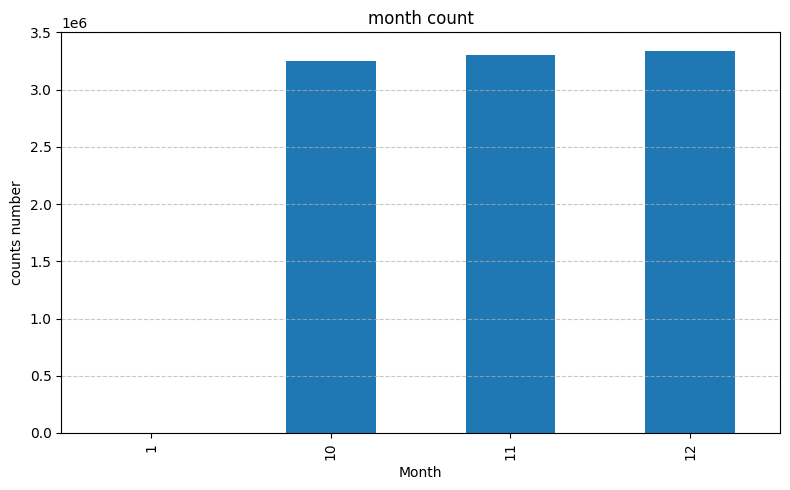

In [9]:
# import matplotlib.pyplot as plt

# 假设你已经有 year_counts，如：
# year_counts = train_data['year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
month_counts.plot(kind='bar')
plt.title("month count")
plt.xlabel('Month')
plt.ylabel('counts number')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
# minimum and maximum longitude test set
min(train_data.pickup_lon.min(), train_data.dropoff_lon.min()), \
max(train_data.pickup_lon.max(), train_data.dropoff_lon.max())

(-74.25, -73.7115199)

In [11]:
# minimum and maximum latitude test
min(train_data.pickup_lat.min(), train_data.dropoff_lat.min()), \
max(train_data.pickup_lat.max(), train_data.dropoff_lat.max())

(40.5167, 40.8986)

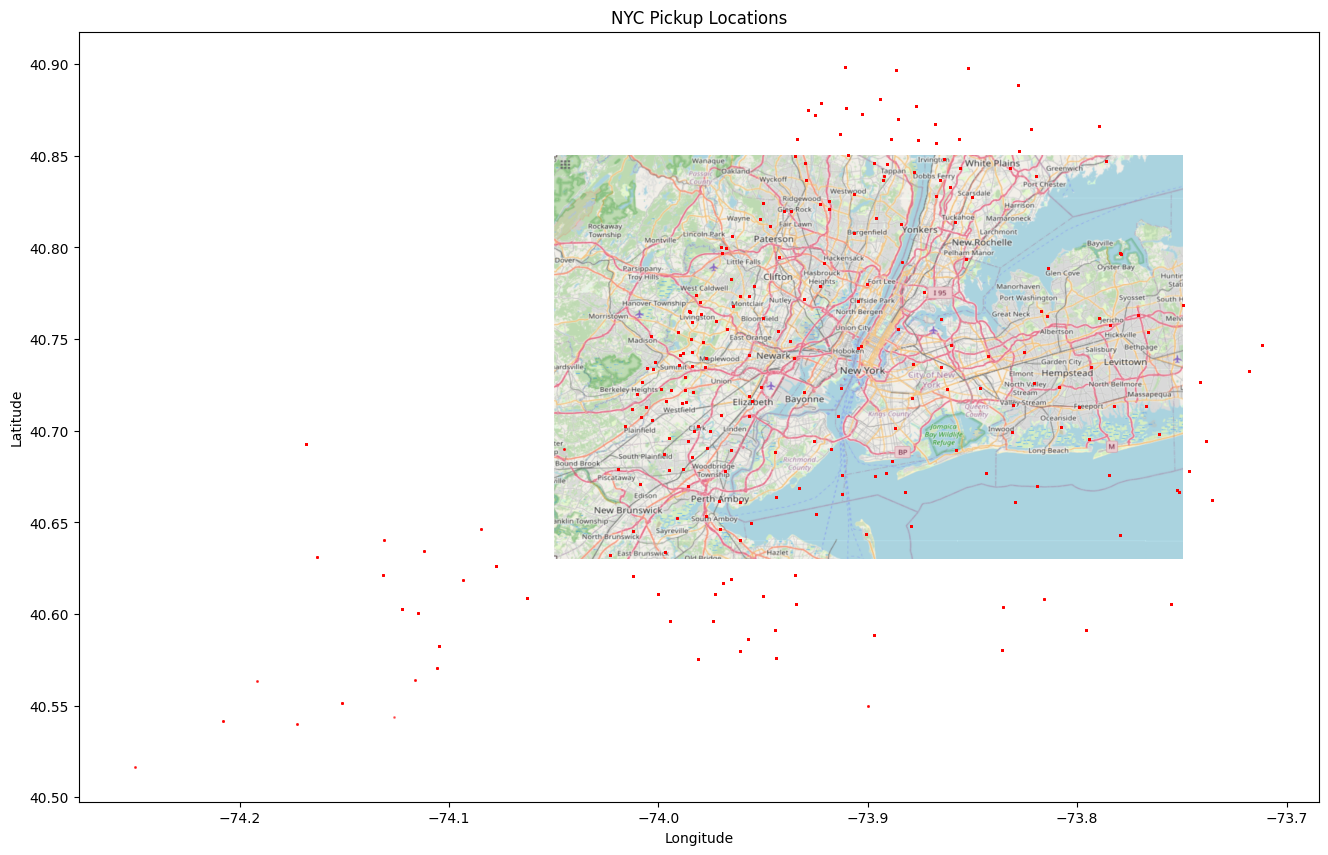

In [12]:
# 手动设置地图边界 (example: NYC zoom)
BB = (-74.05, -73.75, 40.63, 40.85)  # (lon_min, lon_max, lat_min, lat_max)
nyc_map = plt.imread('/content/drive/MyDrive/NYC_yellow_taxi/nyc_map.png')

plt.imshow(nyc_map, extent=BB, aspect='auto')
plt.scatter(train_data.pickup_lon, train_data.pickup_lat, s=1, c='red', alpha=0.5)
plt.title("NYC Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [13]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_lon >= BB[0]) & (df.pickup_lon <= BB[1]) & \
           (df.pickup_lat >= BB[2]) & (df.pickup_lat <= BB[3]) & \
           (df.dropoff_lon >= BB[0]) & (df.dropoff_lon <= BB[1]) & \
           (df.dropoff_lat >= BB[2]) & (df.dropoff_lat <= BB[3])

# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('/content/drive/MyDrive/NYC_yellow_taxi/nyc_map01.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('/content/drive/MyDrive/NYC_yellow_taxi/nyc_map_b.png')

In [14]:
print('Old size: %d' % len(train_data))
train_data = train_data[select_within_boundingbox(train_data, BB)]
print('New size: %d' % len(train_data))

Old size: 9885535
New size: 9746069


In [15]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_lon, df.pickup_lat, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_lon, df.dropoff_lat, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

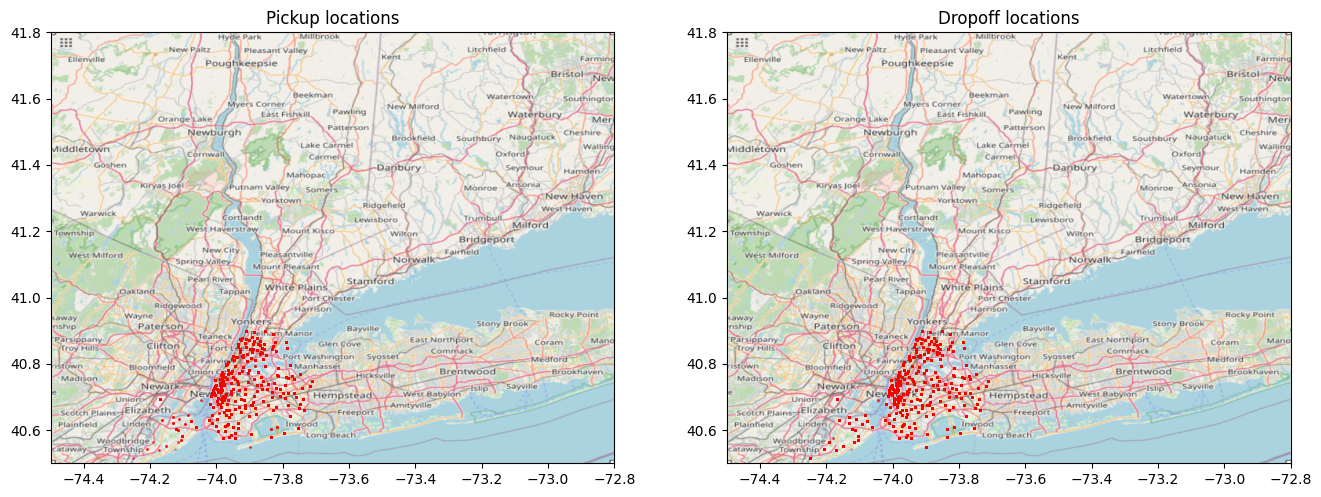

In [16]:
# plot training data on map
plot_on_map(train_data, BB, nyc_map, s=1, alpha=0.3)

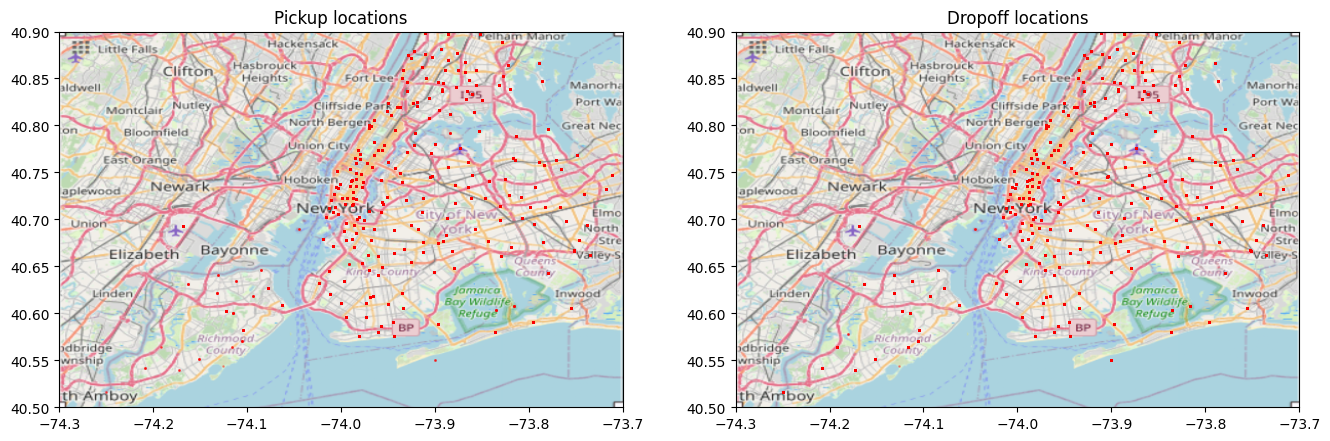

In [17]:
# plot training data on map zoomed in
plot_on_map(train_data, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

### 感觉数据点太稀疏了，需要统计一下所有的数据点

In [18]:
# 方法 1：统计 pickup 点出现次数
pickup_counts = train_data.groupby(['pickup_lat', 'pickup_lon']).size().reset_index(name='count')
pickup_counts

,pickup_lat,pickup_lon,count
0,40.516700,-74.250000,2
1,40.540000,-74.172500,3
2,40.541768,-74.208178,4
3,40.543651,-74.126147,1
4,40.550000,-73.900000,3
...,...,...,...
246,40.881000,-73.894000,471
247,40.888433,-73.828189,323
248,40.897075,-73.886580,44
249,40.897877,-73.852357,309


In [19]:
dropoff_counts = train_data.groupby(['dropoff_lat', 'dropoff_lon']).size().reset_index(name='count')
dropoff_counts

,dropoff_lat,dropoff_lon,count
0,40.516700,-74.250000,39
1,40.540000,-74.172500,92
2,40.541768,-74.208178,41
3,40.543651,-74.126147,1
4,40.550000,-73.900000,164
...,...,...,...
246,40.881000,-73.894000,1338
247,40.888433,-73.828189,731
248,40.897075,-73.886580,259
249,40.897877,-73.852357,968


In [20]:
pickup_counts2 = train_data[['pickup_lat', 'pickup_lon']].value_counts().reset_index(name='count')
pickup_counts2

,pickup_lat,pickup_lon,count
0,40.773600,-73.956600,918440
1,40.765064,-73.985319,461885
2,40.642948,-73.779373,446157
3,40.737463,-74.001456,355014
4,40.759822,-73.972471,351047
...,...,...,...
246,40.540000,-74.172500,3
247,40.690000,-74.045000,3
248,40.516700,-74.250000,2
249,40.563700,-74.191603,2


In [21]:
# dropoff_counts = df.groupby(['dropoff_lat', 'dropoff_lon']) \
#                    .size() \
#                    .reset_index(name='count') \
#                    .sort_values(by='count', ascending=False)

pickup_fare_avg = train_data.groupby(['pickup_lat', 'pickup_lon'])['fare_amount'].mean().reset_index(name='avg_fare')
pickup_fare_avg

,pickup_lat,pickup_lon,avg_fare
0,40.516700,-74.250000,14.250000
1,40.540000,-74.172500,69.263333
2,40.541768,-74.208178,80.600000
3,40.543651,-74.126147,70.990000
4,40.550000,-73.900000,50.396667
...,...,...,...
246,40.881000,-73.894000,33.078917
247,40.888433,-73.828189,33.782786
248,40.897075,-73.886580,39.060000
249,40.897877,-73.852357,40.213657


In [22]:
pickup_stats = train_data.groupby(['pickup_lat', 'pickup_lon']).agg(
    count=('fare_amount', 'size'),
    avg_fare=('fare_amount', 'mean')
).reset_index()
pickup_stats

,pickup_lat,pickup_lon,count,avg_fare
0,40.516700,-74.250000,2,14.250000
1,40.540000,-74.172500,3,69.263333
2,40.541768,-74.208178,4,80.600000
3,40.543651,-74.126147,1,70.990000
4,40.550000,-73.900000,3,50.396667
...,...,...,...,...
246,40.881000,-73.894000,471,33.078917
247,40.888433,-73.828189,323,33.782786
248,40.897075,-73.886580,44,39.060000
249,40.897877,-73.852357,309,40.213657


In [23]:
pickup_stats_sorted = pickup_stats.sort_values(by='count', ascending=False)
pickup_stats_sorted

,pickup_lat,pickup_lon,count,avg_fare
179,40.773600,-73.956600,918440,13.738524
172,40.765064,-73.985319,461885,17.627477
43,40.642948,-73.779373,446157,62.010029
140,40.737463,-74.001456,355014,18.232575
164,40.759822,-73.972471,351047,16.874365
...,...,...,...,...
1,40.540000,-74.172500,3,69.263333
83,40.690000,-74.045000,3,11.166667
0,40.516700,-74.250000,2,14.250000
6,40.563700,-74.191603,2,41.705000


In [28]:
import pandas as pd

# 假设 df 已经包含：pickup_lat, pickup_lon, dropoff_lat, dropoff_lon, fare_amount

# -----------------------------
# 1. 分别统计 pickup 点
pickup_stats = train_data.groupby(['pickup_lat', 'pickup_lon']).agg(
    pickup_count=('fare_amount', 'size'),
    pickup_avg_fare=('fare_amount', 'mean')
).reset_index()

# 2. 分别统计 dropoff 点
dropoff_stats = train_data.groupby(['dropoff_lat', 'dropoff_lon']).agg(
    dropoff_count=('fare_amount', 'size'),
    dropoff_avg_fare=('fare_amount', 'mean')
).reset_index()

# -----------------------------
# 3. 联合统计 (pickup → dropoff) 路径组合
route_stats = train_data.groupby([
    'pickup_lat', 'pickup_lon', 'dropoff_lat', 'dropoff_lon'
]).agg(
    route_count=('fare_amount', 'size'),
    route_avg_fare=('fare_amount', 'mean')
).reset_index()

# 4. 排序（按平均车费降序）
pickup_stats_sorted = pickup_stats.sort_values(by='pickup_count', ascending=False)
dropoff_stats_sorted = dropoff_stats.sort_values(by='dropoff_count', ascending=False)
route_stats_sorted = route_stats.sort_values(by='route_count', ascending=False)


In [29]:
pickup_stats_sorted

,pickup_lat,pickup_lon,pickup_count,pickup_avg_fare
179,40.773600,-73.956600,918440,13.738524
172,40.765064,-73.985319,461885,17.627477
43,40.642948,-73.779373,446157,62.010029
140,40.737463,-74.001456,355014,18.232575
164,40.759822,-73.972471,351047,16.874365
...,...,...,...,...
1,40.540000,-74.172500,3,69.263333
83,40.690000,-74.045000,3,11.166667
0,40.516700,-74.250000,2,14.250000
6,40.563700,-74.191603,2,41.705000


In [30]:
dropoff_stats_sorted

,dropoff_lat,dropoff_lon,dropoff_count,dropoff_avg_fare
180,40.773600,-73.956600,892580,13.847770
173,40.765064,-73.985319,386579,17.770075
141,40.737463,-74.001456,352971,16.865058
161,40.755361,-73.967411,352586,16.188268
164,40.759508,-73.984159,300149,23.572763
...,...,...,...,...
0,40.516700,-74.250000,39,127.610256
23,40.603994,-73.835412,24,38.575000
84,40.690000,-74.045000,4,27.025000
11,40.577744,-74.179962,3,90.500000


In [31]:
route_stats_sorted

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,route_count,route_avg_fare
23167,40.773600,-73.956600,40.773600,-73.956600,235661,8.753787
22001,40.765064,-73.985319,40.773600,-73.956600,62121,12.674398
23160,40.773600,-73.956600,40.765064,-73.985319,55378,13.123868
23152,40.773600,-73.956600,40.759822,-73.972471,44343,12.001249
26750,40.819980,-73.936922,40.773600,-73.956600,41900,9.032404
...,...,...,...,...,...,...
31498,40.898600,-73.911000,40.864725,-73.822106,1,37.500000
31497,40.898600,-73.911000,40.861841,-73.913515,1,20.250000
31494,40.898600,-73.911000,40.850234,-73.909510,1,25.880000
31492,40.898600,-73.911000,40.848434,-73.863746,1,42.500000


In [ ]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_lon, df[idx].pickup_lat, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_lon, df[idx].dropoff_lat, c=c[1], s=0.01, alpha=0.5)

In [ ]:
plot_hires(train_data, (-74.1, -73.7, 40.6, 40.9))

In [ ]:
plot_hires(train_data, (-74, -73.95, 40.7, 40.8))

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# 1. 读取出租车数据
# df = pd.read_csv("your_data.csv")  # 替换为你的数据文件

# 2. 设置边界框（NYC 地理范围）
BB = (-74.5, -72.8, 40.5, 41.8)
lon_min, lon_max, lat_min, lat_max = BB

# 3. 标记 pickup 和 dropoff 是否在城市范围内
train_data['pickup_in_city'] = train_data.apply(lambda row: lon_min <= row['pickup_lon'] <= lon_max and lat_min <= row['pickup_lat'] <= lat_max, axis=1)
train_data['dropoff_in_city'] = train_data.apply(lambda row: lon_min <= row['dropoff_lon'] <= lon_max and lat_min <= row['dropoff_lat'] <= lat_max, axis=1)

# 4. 筛选在城市内的点
filtered_df = train_data[(train_data['pickup_in_city']) & (train_data['dropoff_in_city'])]

# 5. 加载背景地图
nyc_map = Image.open("/content/drive/MyDrive/NYC_yellow_taxi/nyc_map01.png")  # 替换为你的地图图像路径

# 6. 绘图函数
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))

    axs[0].scatter(df.pickup_lon, df.pickup_lat, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations (in city)')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_lon, df.dropoff_lat, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations (in city)')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

    plt.tight_layout()
    plt.show()

# 7. 执行绘图
plot_on_map(filtered_df, BB, nyc_map)


NameError: name 'train_data' is not defined